In [20]:
import random as rd
import numpy as np

In [21]:
unit_step = lambda x: 0 if x < 0 else 1

In [22]:
training_data = [ 
    (np.array([0,0,1]), 0), 
    (np.array([0,1,1]), 1), 
    (np.array([1,0,1]), 1), 
    (np.array([1,1,1]), 1), 
]

In [23]:
w = np.random.rand(3)

In [24]:
errors = [] 
eta = 0.2 
n = 100

In [25]:
for i in range(n): 
    x, expected = rd.choice(training_data) 
    result = np.dot(w, x) 
    error = expected - unit_step(result) 
    errors.append(error) 
    w += eta * error * x

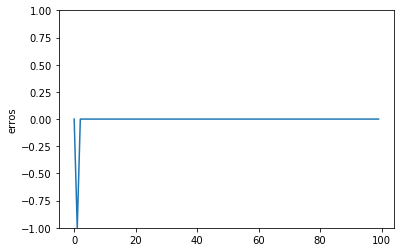

In [26]:
import matplotlib.pyplot as plt
plt.ylim([-1,1])
plt.plot(errors)
plt.ylabel('erros')
plt.show()

# Perceptron 2

http://aimotion.blogspot.com.br/2008/12/artigo-introduzindo-redes-neurais-e_5497.html

In [27]:
from random import random

class  Neuron:
    
    def __init__(self,data,learningRate = 0.1):
        self._learning_rate = learningRate
        self._input,self._output = data
        #Randomise weights.
        self._weight =  map(lambda x: x*random(), [1] * len(self._input))
        #print self._weight
        self._y = None
        self._global_error = 0.0
        
        
    def train(self,data):    
        self._input,self._output = data
        #Calculate output.
        self._y = self._sign(self._sum()) 
        #Calculate error.
        if self._error() != 0:
            #Update weights.
            self._adjustWeight()
        #Convert error to absolute value.
        self._global_error += abs(self._error())
        
    def execute(self,input):
        self._input = input
        #Calculate output.
        self._y = self._sign(self._sum())
        return self._y
        
    
    def _sum(self):
        return sum(map(lambda x,y: x*y, self._input,self._weight))
    
    def _sign(self,output):
        if output < 0:
            y = -1
        else:
            y = 1
        return y
    
    def _error(self):
        return self._output - self._y    
    
    def _adjustWeight(self):
        self._weight = map(lambda x,y: x + (y*self._learning_rate*self._error()),self._weight,self._input)    
    
    def getGlobalError(self):
        return self._global_error
    
    def resetGlobalError(self):
        self._global_error = 0 

In [29]:
class Perceptron:
    
    def __init__(self,inputs,iterations=100):
        self._inputs = inputs
        self._refresh_inputs = list(inputs)
        self._iterations = iterations
        self._iteration = 0
        self._neuron = Neuron(self._getRandInput())
        self._train()
    
    
    def _train(self):
        while self._iteration <= self._iterations:
            self._neuron.resetGlobalError()
            self._refresh_inputs = list(self._inputs)
            for i in range(len(self._refresh_inputs)):
                self._neuron.train(self._getRandInput())
            print("Iteration %d Error: %f" % (self._iteration, self._neuron.getGlobalError()))
            self._iteration += 1
            if(self._neuron.getGlobalError() == 0.0):
                break
                       
        
    def _getRandInput(self):
        return self._refresh_inputs.pop()

    
    def execute(self,input):
        return self._neuron.execute(input)
        
        
    def arange(self,start,stop=None,step=None):
        if stop is None:
            stop = float(start)
            start = 0.0
        if step is None:
            step = 1.0
        cur = float(start)
        while cur <= stop:
            yield cur
            cur+=step

In [34]:
#Load sample input patterns
inputs = [ [[0.72, 0.82], -1], [[0.91, -0.69], -1],
       [[0.46, 0.80], -1],   [[0.03, 0.93], -1],
       [[0.12, 0.25], -1],   [[0.96, 0.47], -1],
       [[0.8, -0.75], -1],   [[0.46, 0.98], -1],
       [[0.66, 0.24], -1],   [[0.72, -0.15], -1],
       [[0.35, 0.01], -1],   [[-0.16, 0.84], -1],
       [[-0.04, 0.68], -1],  [[-0.11, 0.1], 1],
       [[0.31, -0.96], 1],   [[0.0, -0.26], 1],
       [[-0.43, -0.65], 1],  [[0.57, -0.97], 1],
       [[-0.47, -0.03], 1],  [[-0.72, -0.64], 1],
       [[-0.57, 0.15], 1],   [[-0.25, -0.43], 1],
       [[0.47, -0.88], 1],   [[-0.12, -0.9], 1],
       [[-0.58, 0.62], 1],   [[-0.48, 0.05], 1],
       [[-0.79, -0.92], 1],  [[-0.42, -0.09], 1],
       [[-0.76, 0.65], 1],   [[-0.77, -0.76], 1]]


perceptron = Perceptron(inputs,1000)

#Display network generalization
print ("")
print ("X, Y, Output")
for i in perceptron.arange(-1,1,0.5):
    for j in perceptron.arange(-1,1,0.5):
        #Calculate output.
        result =  perceptron.execute(list((i,j)))
        if result == 1:                       
            result = "Blue"
        else:
            result = "Red"
        print ("%f %f %s" % (i,j,result)  )

Iteration 0 Error: 28.000000
Iteration 1 Error: 26.000000
Iteration 2 Error: 26.000000
Iteration 3 Error: 26.000000
Iteration 4 Error: 26.000000
Iteration 5 Error: 26.000000
Iteration 6 Error: 26.000000
Iteration 7 Error: 26.000000
Iteration 8 Error: 26.000000
Iteration 9 Error: 26.000000
Iteration 10 Error: 26.000000
Iteration 11 Error: 26.000000
Iteration 12 Error: 26.000000
Iteration 13 Error: 26.000000
Iteration 14 Error: 26.000000
Iteration 15 Error: 26.000000
Iteration 16 Error: 26.000000
Iteration 17 Error: 26.000000
Iteration 18 Error: 26.000000
Iteration 19 Error: 26.000000
Iteration 20 Error: 26.000000
Iteration 21 Error: 26.000000
Iteration 22 Error: 26.000000
Iteration 23 Error: 26.000000
Iteration 24 Error: 26.000000
Iteration 25 Error: 26.000000
Iteration 26 Error: 26.000000
Iteration 27 Error: 26.000000
Iteration 28 Error: 26.000000
Iteration 29 Error: 26.000000
Iteration 30 Error: 26.000000
Iteration 31 Error: 26.000000
Iteration 32 Error: 26.000000
Iteration 33 Error: 

# 2

https://github.com/Christof93/perceptron/blob/master/perceptron_algorithm.ipynb

In [1]:
import numpy as np

In [4]:
def sigmoid(a,x):
    return 1/(1 + np.exp(-a*x))

In [5]:
def unit_step(x):
    return 1.0* (x>=0)

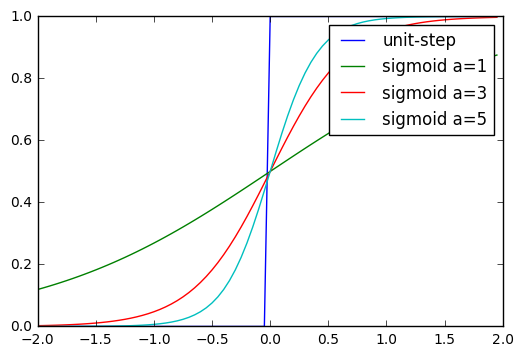

In [6]:
#%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt

x = np.arange(-2., 2., 0.05)
plt.plot(x,unit_step(x),label="unit-step")
# the paramter alpha determines the "steepness" of the sigmoid function
for i in range(1,6,2):
    plt.plot(x,sigmoid(i,x),label="sigmoid a="+str(i))

plt.legend()
plt.show()

Agora queremos encontrar um algoritmo que atualize a matriz de peso com base na diferença entre o valor da função acima eo resultado desejado que queremos aprender. O algoritmo é uma forma de aprendizagem supervisionada.

O exemplo mais simples é tentar modelar funções lógicas com duas entradas. Vamos tentar a função AND

In [ ]:
# input [0,0] output 0
training_set_and = [
    ([0,0],0),
    ([0,1],0),
    ([1,0],0),
    ([1,1],1)
]

lets also define a set of weights with the same dimensionality as our input-vector.

Permite também definir um conjunto de pesos com a mesma dimensionalidade do nosso vetor de entrada.

In [8]:
weights = [0,0] #synaptic strength

Compute the output:
Calcule a saída:

In [11]:
results=[]
for input,desired_out in training_set_and:
    #-0.5 is our threshold here.
    # np.dot does this: x1*w1 + x2*w2 when input = [x1,x2], weights= [w1,w2]
    result = unit_step(np.dot(input,weights)-0.5)
    
    print(input, result, desired_out)
    results.append((input, result, desired_out))

[0, 0] 0.0 0
[0, 1] 0.0 0
[1, 0] 0.0 0
[1, 1] 0.0 1


one out of four inputs is not correct so we might want to change the weigths there. Let's update the corresponding weights:

Uma em cada quatro entradas não está correta, então podemos querer alterar os pesos lá. Vamos atualizar os pesos correspondentes:

In [13]:

for input, outp, desir_out in results:
    error = desir_out-outp
    print("error:", error)
    if abs(error) > 0.0:
        for i,val in enumerate(input):
            ## 0.2 is the learning rate which we can choose freely between 0 and 1
            # with this formula we update the weights
            print("weight",i+1,":",weights[i]," + ",val * error *0.2)
            weights[i] += val * error * 0.2
print(weights)

error: 0.0
error: 0.0
error: 0.0
error: 1.0
weight 1 : 0  +  0.2
weight 2 : 0  +  0.2
[0.20000000000000001, 0.20000000000000001]


In [16]:
#Now lets do this procedure until we have no more errors.

weights = [0.0,0.0]
for i in range(100):
    error_count=0
    for input,desired_out in training_set_and:
        #compute output
        result = unit_step(np.dot(input,weights)-0.5)
        print("input:",input, "output:",result, "true result:",desired_out)
        #compute error
        error= desired_out-result
        #print error
        if abs(error) > 0.0:
            error_count+=1
            for i,val in enumerate(input):
                ## 0.2 is the learning rate which we can choose freely between 0 and 1
                weights[i]+= val * error * 0.2
    if error_count==0:
        break
    print ("-"*40)
    print (weights)
    print ("-"*40)

input: [0, 0] output: 0.0 true result: 0
input: [0, 1] output: 0.0 true result: 0
input: [1, 0] output: 0.0 true result: 0
input: [1, 1] output: 0.0 true result: 1
----------------------------------------
[0.20000000000000001, 0.20000000000000001]
----------------------------------------
input: [0, 0] output: 0.0 true result: 0
input: [0, 1] output: 0.0 true result: 0
input: [1, 0] output: 0.0 true result: 0
input: [1, 1] output: 0.0 true result: 1
----------------------------------------
[0.40000000000000002, 0.40000000000000002]
----------------------------------------
input: [0, 0] output: 0.0 true result: 0
input: [0, 1] output: 0.0 true result: 0
input: [1, 0] output: 0.0 true result: 0
input: [1, 1] output: 1.0 true result: 1


Thanks to the correct threshold and a fast learning rate we found the solution already after two iterations. The same threshold won't work for a NAND input. Which makes sense if you think about it. The input 0,0 which should give 1, can never get over a positive threshold value. (if we subtract -0.5 it will always be less than 0) So, do we have to define a different threshold for each function we want to approximate? What if we don't know what a good threshold would be? One way to circumvent this is adding a constant 1 to the inputs, so that one of the weights is not depending on input and becomes a variable threshold which can also be learned in the algorithm. We call this a bias input.

Graças ao limiar/threshold correto e uma taxa de aprendizado rápido, encontramos a solução já após duas iterações. O mesmo limite não funcionará para uma entrada NAND. O que faz sentido se você pensar sobre isso. A entrada 0,0 que deve dar 1, nunca pode superar um valor de limiar positivo. (Se subtrair -0.5 será sempre menor que 0) Então, temos que definir um limiar diferente para cada função que queremos aproximar? E se nós não sabemos o que seria um bom limiar? Uma maneira de contornar isso é adicionar uma constante 1 às entradas, de modo que um dos pesos não dependa da entrada e se torne um limiar variável que também pode ser aprendido no algoritmo. Chamamos isso de entrada de viés.

In [17]:
# input sets and weights have one column more
training_set_nand = [([0,0,1],1),([0,1,1],1),([1,0,1],1),([1,1,1],0)]
weights = [0.0,0.0,0.0]
for i in range(100):
    error_count=0
    for input,desired_out in training_set_nand:
        result = unit_step(np.dot(input,weights)) 
        print ("input:",input, "output:",result, "true result:",desired_out)
        error= desired_out-result
        #print error
        if abs(error) > 0.0:
            error_count+=1
            for i,val in enumerate(input):
                ## 0.2 is the learning rate which we can choose freely between 0 and 1
                weights[i]+= val * error * 0.2
    if error_count==0:
        break
    print ("-"*60)
    print (weights)
    print ("-"*60)

input: [0, 0, 1] output: 1.0 true result: 1
input: [0, 1, 1] output: 1.0 true result: 1
input: [1, 0, 1] output: 1.0 true result: 1
input: [1, 1, 1] output: 1.0 true result: 0
------------------------------------------------------------
[-0.20000000000000001, -0.20000000000000001, -0.20000000000000001]
------------------------------------------------------------
input: [0, 0, 1] output: 0.0 true result: 1
input: [0, 1, 1] output: 0.0 true result: 1
input: [1, 0, 1] output: 1.0 true result: 1
input: [1, 1, 1] output: 1.0 true result: 0
------------------------------------------------------------
[-0.40000000000000002, -0.20000000000000001, 0.0]
------------------------------------------------------------
input: [0, 0, 1] output: 1.0 true result: 1
input: [0, 1, 1] output: 0.0 true result: 1
input: [1, 0, 1] output: 0.0 true result: 1
input: [1, 1, 1] output: 1.0 true result: 0
------------------------------------------------------------
[-0.40000000000000002, -0.20000000000000001, 0.200

We can find the result after 5 iterations. Now let's plot the decision boundary we found.

In [18]:
def predict(inp,w):
    #dot product of all but last column + identity of last weight
    return np.dot(inp,w[:-1])+w[-1] > 0

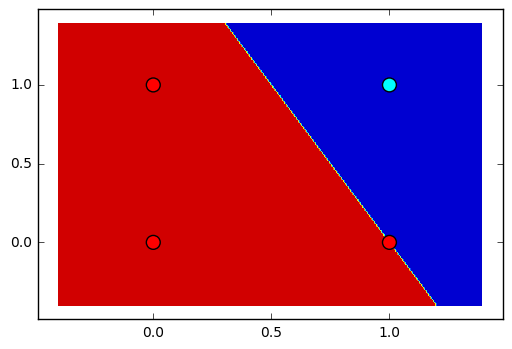

In [19]:
def plot_decision(input,prediction_func):
    xx=np.arange(-0.4,1.4,0.01);
    yy=np.arange(-0.4,1.4,0.01);
    zz=np.arange(-0.4,1.4,0.01);
    colors=['cyan','red']
    outp=[out for i,out in input]
    inp=np.array([i for i,out in input])
    
    minx=inp[:, 0].min()
    maxx=inp[:, 0].max()
    miny=inp[:, 1].min()
    maxy=inp[:, 1].max()
    
    xx=np.arange(minx-0.4,maxx+0.4,0.01)
    yy=np.arange(miny-0.4,maxy+0.4,0.01)
    
    # create a mesh of all points
    xx, yy = np.meshgrid(xx,yy)
    if (len(inp[0])==4):
        Z = prediction_func(np.c_[xx.ravel(), yy.ravel(),xx.ravel()*yy.ravel()],weights)
    else:
        Z = prediction_func(np.c_[xx.ravel(), yy.ravel()],weights)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z)
    
    # Plot also the training points
    plt.scatter(inp[:, 0], inp[:, 1],c=[colors[i] for i in outp],s=100)
    plt.show()

plot_decision(training_set_nand,predict)

The separating line goes really near at point 1,0, which is bad. If our data were a little noisy the prediction would be wrong. Since we don't change the weights once our algorithm stops making errors, we cannot move this line anymore as soon as a solution on the input data is found. If we use a sigmoid function to determine our result, we can minimize the error.

A linha de separação vai muito perto no ponto 1.0, o que é ruim. Se nossos dados fossem um pouco ruidosos, a previsão seria errada. Uma vez que não alteramos os pesos uma vez que nosso algoritmo deixa de cometer erros, não podemos mover essa linha mais logo que uma solução nos dados de entrada é encontrada. Se usarmos uma função sigmóide para determinar nosso resultado, podemos minimizar o erro.

results after 10 iterations:
true result: 1 output: 0.82121598665
true result: 1 output: 0.661058470925
true result: 1 output: 0.671575249259
true result: 0 output: 0.546249442973
results after 10000 iterations:
true result: 1 output: 0.999999997245
true result: 1 output: 0.998748089356
true result: 1 output: 0.99874793272
true result: 0 output: 0.00175269550643
[-6.5144406357835551, -6.5141276518874829, 9.855093593661655]


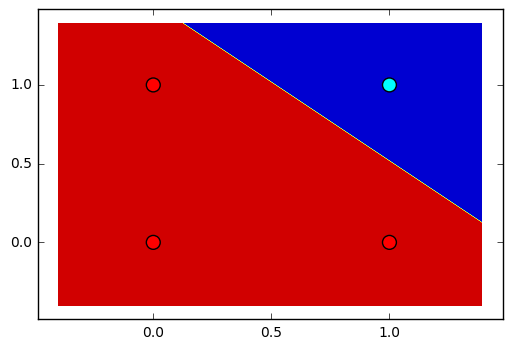

In [28]:
#additional 1 in each input vector
training_set_nand = [([0,0,1],1),([0,1,1],1),([1,0,1],1),([1,1,1],0)]
# weights must be 3 dimensional now like the input vectors
weights = [0.0,0.0,0.0]
for it in range(10000):
    if it==9 or it==9999:
        print ("results after", str(it+1),"iterations:")
    for input,desired_out in training_set_nand:
        result = sigmoid(2,np.dot(input,weights))
        if it==9 or it==9999:
            print ("true result:",desired_out, "output:",result)
        error= desired_out-result
        if abs(error) > 0.0:
            for i,val in enumerate(input):
                ## 0.2 is the learning rate which we can choose freely between 0 and 1
                weights[i]+= val * error * 0.2
print (weights)
plot_decision(training_set_nand,predict)

As you can see, we can't output the exact result. We only approach it. The decision boundary approaches the best separation line between the classes with more and more iterations. If you take a sigmoid with a steeper slope it will approach faster. You don't want it to be too steep though, because then it is possible that you miss the optimal slope since the error becomes too small. This kind of Perceptron is the same as a logistic regression model (also called maximum entropy classifier). Another name for it could be a single-layer neural network.

Como você pode ver, não podemos produzir o resultado exato. Só nos aproximamos dela. O limite de decisão se aproxima da melhor linha de separação entre as classes com mais e mais iterações. Se você tomar um sigmóide com um declive mais íngreme, ele se aproximará mais rápido. Você não quer que seja muito íngreme, porque, então, é possível que você perca a inclinação ideal uma vez que o erro torna-se muito pequeno. Este tipo de Perceptron é o mesmo que um modelo de regressão logística (também chamado de entropia máxima classificador). Outro nome para ele poderia ser uma rede neural de camada única.

weights: [-0.23648972 -0.23648972  0.41924733]
bias: [ 0.41924733]


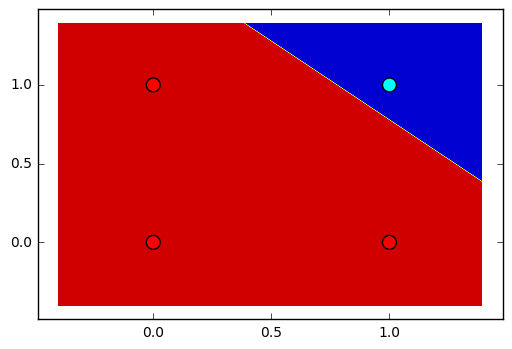

In [22]:
from sklearn.linear_model import LogisticRegression
X= np.array([inp for inp,outp in training_set_nand])
y= np.array([outp for inp,outp in training_set_nand])
h = LogisticRegression()
h.fit(X, y)
weights=h.coef_[0]

print ("weights:" ,weights)
print ("bias:",h.intercept_)
plot_decision(training_set_nand,predict)